In [1]:
# 0) Setup: import packages
import requests
import pandas as pd
import numpy as np

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 1200)

In [3]:
# 1) Pull data from the Makeup API
#    Main endpoint (all products):
#    http://makeup-api.herokuapp.com/api/v1/products.json
BASE_URL = "http://makeup-api.herokuapp.com/api/v1/products.json"

In [4]:
# --- Option A: pull ALL products in one call  ---
resp = requests.get(BASE_URL, timeout=30)
resp.raise_for_status() 

In [5]:
data_json = resp.json()  # list of dicts
print("Number of records pulled:", len(data_json))
print("Sample keys:", list(data_json[0].keys()))

Number of records pulled: 931
Sample keys: ['id', 'brand', 'name', 'price', 'price_sign', 'currency', 'image_link', 'product_link', 'website_link', 'description', 'rating', 'category', 'product_type', 'tag_list', 'created_at', 'updated_at', 'product_api_url', 'api_featured_image', 'product_colors']


In [6]:
# Convert to DataFrame
df_raw = pd.DataFrame(data_json)
df_raw.head()

,id,brand,name,price,price_sign,currency,image_link,product_link,website_link,description,rating,category,product_type,tag_list,created_at,updated_at,product_api_url,api_featured_image,product_colors
0,1048,colourpop,Lippie Pencil,5.0,$,CAD,https://cdn.shopify.com/s/files/1/1338/0845/co...,https://colourpop.com/collections/lippie-pencil,https://colourpop.com,Lippie Pencil A long-wearing and high-intensit...,NaN,pencil,lip_liner,"[cruelty free, Vegan]",2018-07-08T23:45:08.056Z,2018-07-09T00:53:23.301Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#B28378', 'colour_name': 'BFF ..."
1,1047,colourpop,Blotted Lip,5.5,$,CAD,https://cdn.shopify.com/s/files/1/1338/0845/pr...,https://colourpop.com/collections/lippie-stix?...,https://colourpop.com,Blotted Lip Sheer matte lipstick that creates ...,NaN,lipstick,lipstick,"[cruelty free, Vegan]",2018-07-08T22:01:20.178Z,2018-07-09T00:53:23.287Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#b72227', 'colour_name': 'Bee'..."
2,1046,colourpop,Lippie Stix,5.5,$,CAD,https://cdn.shopify.com/s/files/1/1338/0845/co...,https://colourpop.com/collections/lippie-stix,https://colourpop.com,"Lippie Stix Formula contains Vitamin E, Mango,...",NaN,lipstick,lipstick,"[cruelty free, Vegan]",2018-07-08T21:47:49.858Z,2018-07-09T00:53:23.274Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#F2DEC3', 'colour_name': 'Fair..."
3,1045,colourpop,No Filter Foundation,12.0,$,CAD,https://cdn.shopify.com/s/files/1/1338/0845/pr...,https://colourpop.com/products/no-filter-matte...,https://colourpop.com/products/no-filter-matte...,"Developed for the Selfie Age, our buildable fu...",NaN,liquid,foundation,"[cruelty free, Vegan]",2018-07-08T18:22:25.273Z,2018-07-09T00:53:23.313Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#F2DEC3', 'colour_name': 'Fair..."
4,1044,boosh,Lipstick,26.0,$,CAD,https://cdn.shopify.com/s/files/1/1016/3243/pr...,https://www.boosh.ca/collections/all,https://www.boosh.ca/,All of our products are free from lead and hea...,NaN,lipstick,lipstick,"[Chemical Free, Organic]",2018-07-08T17:32:28.088Z,2018-09-02T22:52:06.669Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#CB4975', 'colour_name': 'Babs..."


In [7]:
# 2) Quick sanity checks (API + structure)
df_raw.shape, df_raw.columns

((931, 19),
 Index(['id', 'brand', 'name', 'price', 'price_sign', 'currency', 'image_link', 'product_link', 'website_link', 'description', 'rating', 'category', 'product_type', 'tag_list', 'created_at', 'updated_at', 'product_api_url', 'api_featured_image', 'product_colors'], dtype='object'))

In [8]:
# 3) pull only a subset
params = {
    "brand": "maybelline",
    # "product_type": "lipstick"
}

resp2 = requests.get(BASE_URL, params=params, timeout=30)
resp2.raise_for_status()
data_json2 = resp2.json()

df_maybelline = pd.DataFrame(data_json2)
print("Maybelline rows:", df_maybelline.shape[0])
df_maybelline.head()

Maybelline rows: 54


,id,brand,name,price,price_sign,currency,image_link,product_link,website_link,description,rating,category,product_type,tag_list,created_at,updated_at,product_api_url,api_featured_image,product_colors
0,495,maybelline,Maybelline Face Studio Master Hi-Light Light B...,14.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/991799...,https://well.ca/products/maybelline-face-studi...,https://well.ca,Maybelline Face Studio Master Hi-Light Light B...,5.0,None,bronzer,[],2016-10-01T18:36:15.012Z,2017-12-23T21:08:50.624Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,[]
1,488,maybelline,Maybelline Fit Me Bronzer,10.29,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/d4f7d8...,https://well.ca/products/maybelline-fit-me-bro...,https://well.ca,Why You'll Love It\n\nLightweight pigments ble...,4.5,None,bronzer,[],2016-10-01T18:36:05.584Z,2017-12-23T21:08:49.985Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#CF9978', 'colour_name': 'Medi..."
2,477,maybelline,Maybelline Facestudio Master Contour Kit,15.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/4f731d...,https://well.ca/products/maybelline-facestudio...,https://well.ca,Maybelline Facestudio Master Contour Kit is th...,NaN,None,bronzer,[],2016-10-01T18:35:40.504Z,2017-12-23T21:08:48.157Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,"[{'hex_value': '#9B7163', 'colour_name': None}..."
3,468,maybelline,Maybelline Face Studio Master Hi-Light Light B...,14.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/462103...,https://well.ca/products/maybelline-face-studi...,https://well.ca,Maybelline Face Studio Master Hi-Light Light B...,NaN,powder,blush,[],2016-10-01T18:35:27.706Z,2017-12-23T21:08:47.102Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,[]
4,452,maybelline,Maybelline Face Studio Master Hi-Light Light B...,14.99,None,None,https://d3t32hsnjxo7q6.cloudfront.net/i/e8c59b...,https://well.ca/products/maybelline-face-studi...,https://well.ca,Maybelline Face Studio Master Hi-Light Light B...,5.0,powder,blush,[],2016-10-01T18:35:07.476Z,2017-12-23T20:51:17.460Z,http://makeup-api.herokuapp.com/api/v1/product...,//s3.amazonaws.com/donovanbailey/products/api_...,[]


In [12]:
# Missing data check
missing_count = df.isna().sum()
missing_pct = (df.isna().mean() * 100).round(2)

missing_summary = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct
}).sort_values("missing_pct", ascending=False)

missing_summary

,missing_count,missing_pct
rating,591,63.48
price_sign,563,60.47
currency,563,60.47
category,414,44.47
price,14,1.50
brand,12,1.29
description,1,0.11
tag_list,0,0.00
api_featured_image,0,0.00
product_api_url,0,0.00


We observe substantial missingness in the rating variable, with over 60% of products lacking consumer ratings. This pattern is expected in product-level consumer data, as many items may be newly released or have limited user engagement.

Price information, which is central to our analysis, is largely complete, with only a small fraction of missing values. Fields such as currency and price sign show high missingness, but this appears to reflect API design choices rather than true data absence, since prices are still available numerically.

Overall, missing values are documented and do not prevent meaningful analysis of the price–rating relationship.

In [13]:
# Convert price to numeric
df["price_num"] = pd.to_numeric(df["price"], errors="coerce")

# Basic sanity checks
df["price_num"].describe()

count    917.000000
mean      16.508593
std       11.028035
min        0.000000
25%        8.990000
50%       13.990000
75%       22.000000
max       77.000000
Name: price_num, dtype: float64

Prices are stored as strings and are converted to numeric values.
We observe that min price is zero, which likely reflect unavailable pricing rather than truly free products. These observations are flagged and treated carefully in downstream analysis.

In [18]:
# Check suspicious price values
df.loc[df["price_num"] <= 0, ["brand", "name", "price", "price_num"]].head(5)

,brand,name,price,price_num
7,zorah biocosmetiques,Liquid Liner,0.0,0.0
8,zorah biocosmetiques,Eyeshadow,0.0,0.0
9,w3llpeople,Realist Invisible Setting Powder,0.0,0.0
10,sally b's skin yummies,B Smudged,0.0,0.0
11,sally b's skin yummies,B Glossy Lip Gloss,0.0,0.0


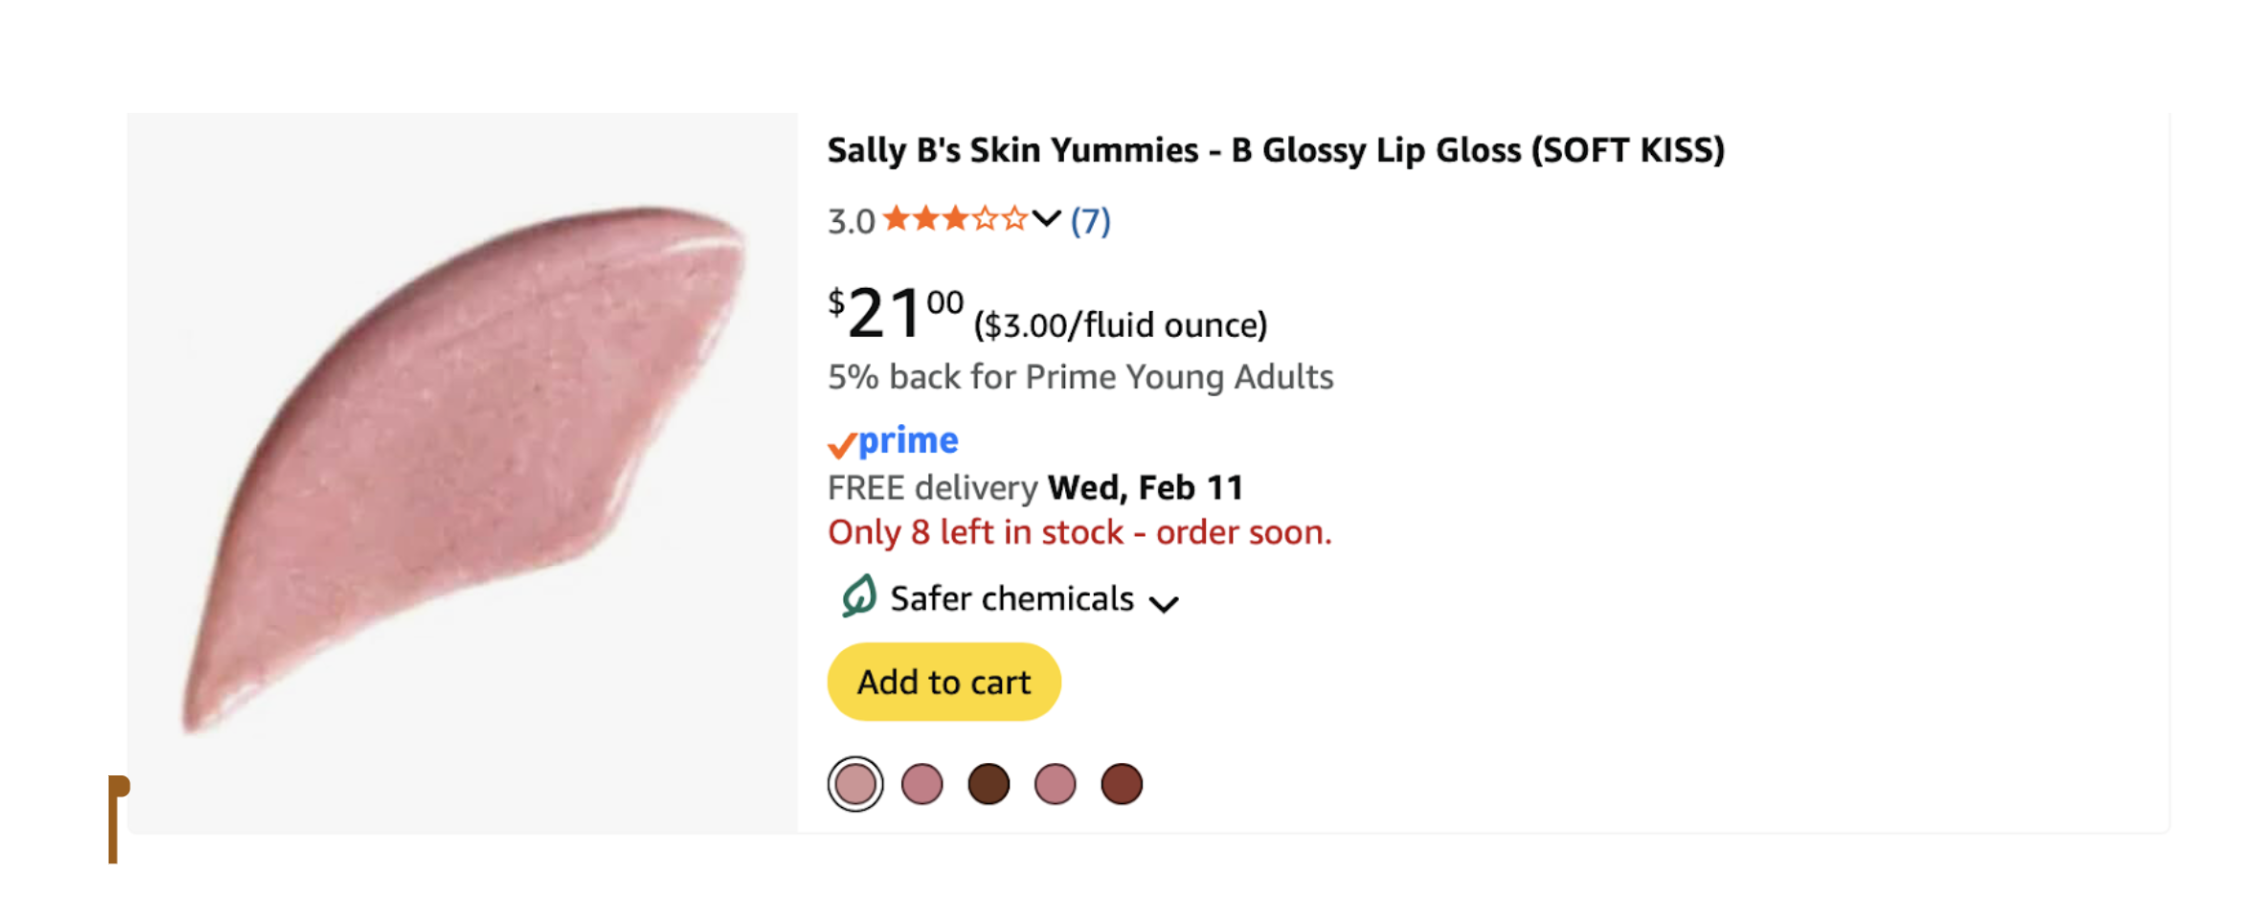

In [15]:
# Rating sanity check
df["rating"].describe()

count    340.000000
mean       4.319118
std        0.675849
min        1.500000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

The rating variable appears to be well-behaved and internally consistent. Ratings are bounded between 1.5 and 5, which aligns with the expected 0–5 rating scale. The distribution is skewed toward higher values, with a median rating of 4.5 and an upper quartile at 5.0, suggesting generally positive consumer feedback among rated products. No implausible rating values are observed.

In [20]:
# Create analysis subset for price vs rating

analysis_cols = [
    "brand",
    "name",
    "product_type",
    "price_num",
    "rating"
]

In [21]:
df_analysis = (
    df[analysis_cols]
    .dropna(subset=["price_num", "rating"])
    .loc[df["price_num"] > 0]
)

df_analysis.shape

(340, 5)

In [22]:
df_analysis.describe()

,price_num,rating
count,340.000000,340.000000
mean,14.235618,4.319118
std,8.138598,0.675849
min,1.990000,1.500000
25%,9.715000,4.000000
50%,11.990000,4.500000
75%,17.290000,5.000000
max,60.000000,5.000000


Within the analysis subset, the maximum observed price is $60, which is not particularly high relative to the broader makeup market. This likely reflects the fact that our analysis is restricted to products with available ratings. More expensive products may receive fewer consumer reviews and therefore lack ratings, causing them to be excluded from the subset. As a result, the observed price range may underrepresent higher-end products.

In [23]:
# Price range by product type
price_by_type = (
    df_analysis
    .groupby("product_type")["price_num"]
    .agg(
        count="count",
        min_price="min",
        q25=lambda x: x.quantile(0.25),
        median_price="median",
        q75=lambda x: x.quantile(0.75),
        max_price="max",
        mean_price="mean"
    )
    .sort_values("median_price", ascending=False)
)

price_by_type

,count,min_price,q25,median_price,q75,max_price,mean_price
product_type,,,,,,,
bronzer,24,4.99,11.6150,19.99,25.2500,60.00,21.151667
foundation,54,4.99,11.9925,17.14,19.9900,44.00,17.628333
blush,36,6.99,9.9900,14.24,15.9900,32.00,15.139444
eyeliner,53,1.99,8.9900,10.99,14.7900,30.00,11.891509
eyeshadow,40,1.99,7.7475,10.99,17.9900,56.49,14.631250
lipstick,40,1.99,9.7400,10.99,13.9675,34.00,12.473500
mascara,49,3.49,9.9900,10.99,15.7900,33.00,12.822041
nail_polish,33,1.99,8.0000,10.00,14.9900,22.49,11.563636
lip_liner,11,3.99,4.9900,9.99,11.7400,20.49,10.109091


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

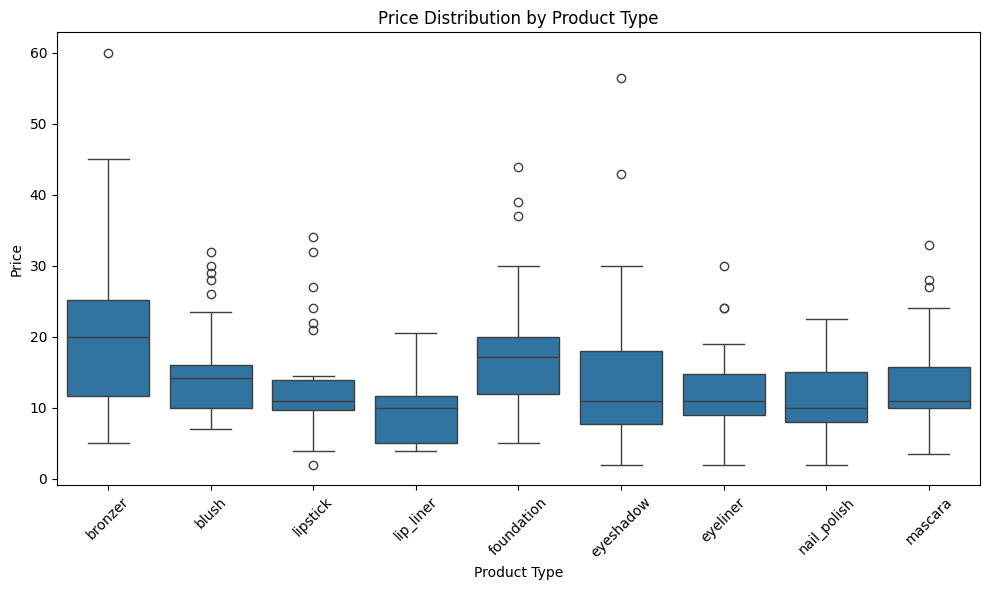

In [25]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_analysis,
    x="product_type",
    y="price_num"
)

plt.xlabel("Product Type")
plt.ylabel("Price")
plt.title("Price Distribution by Product Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# Correlation matrix
corr = df_analysis[["price_num", "rating"]].corr()

corr

,price_num,rating
price_num,1.000000,0.018888
rating,0.018888,1.000000


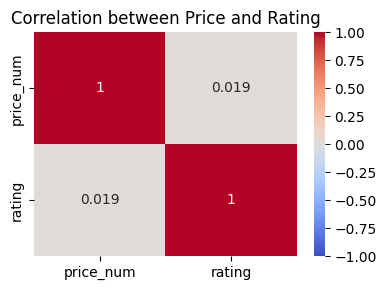

In [27]:
# Heatmap visualization
plt.figure(figsize=(4, 3))

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)

plt.title("Correlation between Price and Rating")
plt.tight_layout()
plt.show()

We didn't see a correlation between rating and prices, overall, so we determined it would be important to do it by product type.

In [28]:
# Correlation between price and rating by product type
corr_by_type = (
    df_analysis
    .groupby("product_type")
    .apply(lambda x: x["price_num"].corr(x["rating"]))
    .reset_index()
    .rename(columns={0: "price_rating_corr"})
    .sort_values("price_rating_corr", ascending=False)
)

corr_by_type

/var/folders/6m/q6zb92755z5065bkvhhk_4g40000gn/T/ipykernel_9876/4204430920.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["price_num"].corr(x["rating"]))


,product_type,price_rating_corr
8,nail_polish,0.146070
1,bronzer,0.143658
5,lip_liner,0.110326
4,foundation,0.095679
0,blush,0.075796
6,lipstick,0.036707
2,eyeliner,-0.090764
7,mascara,-0.097446
3,eyeshadow,-0.294135


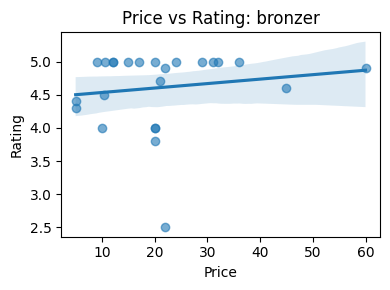

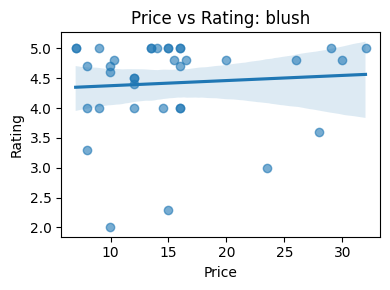

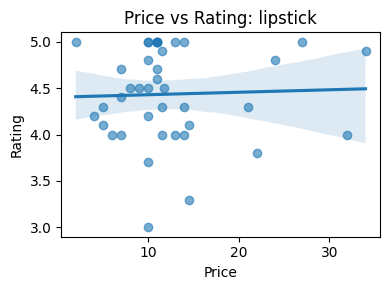

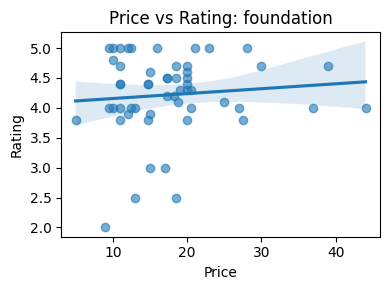

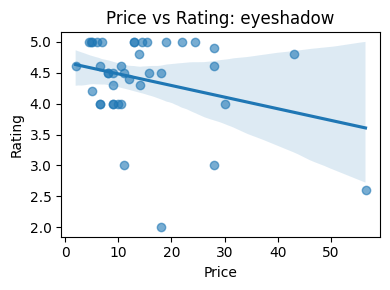

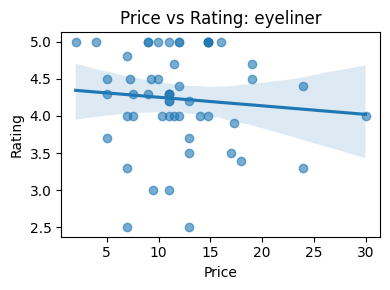

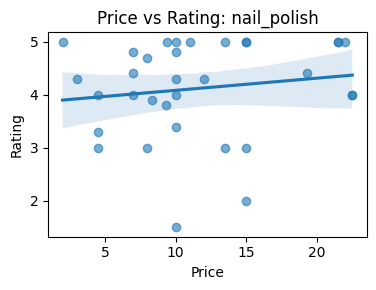

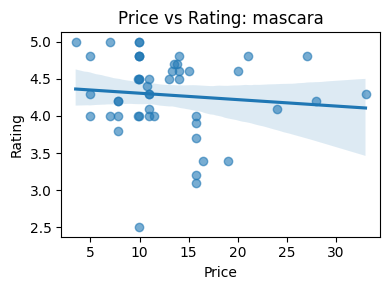

In [29]:
product_types = df_analysis["product_type"].unique()

for pt in product_types:
    subset = df_analysis[df_analysis["product_type"] == pt]
    
    if len(subset) < 20:
        continue  # skip very small groups
    
    plt.figure(figsize=(4, 3))
    sns.regplot(
        data=subset,
        x="price_num",
        y="rating",
        scatter_kws={"alpha": 0.6}
    )
    
    plt.title(f"Price vs Rating: {pt}")
    plt.xlabel("Price")
    plt.ylabel("Rating")
    plt.tight_layout()
    plt.show()

## Summary

Table X reports the correlation between price and consumer rating calculated separately for each product type. Across all categories, the correlations are relatively small in magnitude, indicating that price is generally a weak predictor of consumer satisfaction.

Notably, the direction of the relationship varies by product type. For example, nail polish and bronzer exhibit weak positive correlations, suggesting that higher-priced products in these categories tend to receive slightly higher ratings. In contrast, categories such as mascara, eyeliner, and especially eyeshadow show negative correlations, indicating that higher prices are not associated with higher ratings and may even correspond to lower consumer evaluations.

These results highlight substantial heterogeneity across product types and suggest that the relationship between price and perceived quality is category-specific rather than universal.